<a href="https://colab.research.google.com/github/pluieciel/econometrics/blob/master/notebooks/1_2_costsalary_firstprogram%26other_OLS_methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Build environment:

In [0]:
    # -*- coding: utf-8 -*-
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from io import StringIO  
import urllib.request

Load data:

(or from local path)
my = np.loadtxt(open(r'C:\Users\xxxxx\costsalary.csv','r'),delimiter=";",skiprows=1)

In [0]:
data = urllib.request.urlopen('https://raw.githubusercontent.com/pluieciel/econometrics/master/data/costsalary.csv').read().decode('ascii', 'ignore')
my = np.loadtxt(StringIO(data),delimiter=";",skiprows=1)
x, y = zip(*my)
X = sm.add_constant(x)

Method 1: statsmodels.api.OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.137
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     20.20
Date:                Sun, 21 Jul 2019   Prob (F-statistic):           1.55e-05
Time:                        15:05:42   Log-Likelihood:                -1393.7
No. Observations:                 129   AIC:                             2791.
Df Residuals:                     127   BIC:                             2797.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.635e+04   5214.053      5.053      0.0

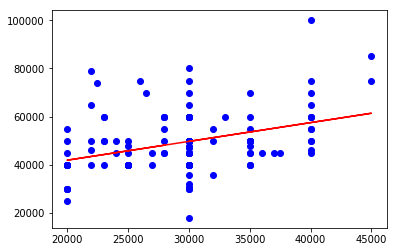

In [271]:
results = sm.OLS(y,X).fit()
print(results.summary())
plt.plot(x,y,'bo',x,results.fittedvalues,'r')
print(*results.params)

Method 2: normal equation: alpha and beta θ=(X.T*X).I*X.T*y

In [0]:
A=(np.mat(X).T*np.mat(X)).I*np.mat(X).T*np.mat(y).T   
a,b=A[0,0],A[1,0]
print(a,b)

26345.695423462752 0.7795671600719697


Method 3: beta=Cov/Var

In [0]:
beta= np.cov(x,y)[1][0]/np.cov(x,y)[0][0]
alpha=np.mean(y)-beta*np.mean(x)
print(alpha,beta)

26345.695423462876 0.7795671600719656


Method 4: gradient descent

In [0]:
def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '--')

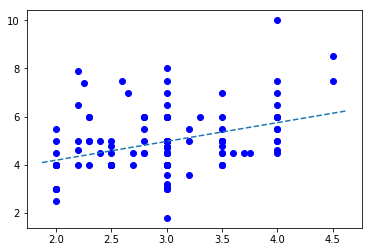

2.6345695218366094 0.7795671667804006


In [443]:
theta=np.mat([[0],[1]])
step=0.1
m=len(y)
xx=np.array(x).reshape(-1,1)/10000;yy=np.array(y).reshape(-1,1)/10000
XX=np.concatenate((np.ones(m).reshape(-1,1),xx),axis=1)
for _ in range(5000):
  theta=theta-step/m*(np.mat(XX).T*(np.mat(XX)*theta-np.mat(yy)))
plt.plot(xx,yy,'bo')  
abline(theta[1,0],theta[0,0])
plt.show()
print(theta[0,0],theta[1,0])